In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 176MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flight-price-prediction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

#Getting data ready
#Import all tools we need

#Regular EDA ( Exploratory Data Analysis )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to be availble inside notebook
%matplotlib inline 

#Models from Scikit Learn
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor,HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



#Model evaulation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_log_error,r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Setup random seed
import numpy as np
np.random.seed(42)

## **Import Training Data**

In [ ]:
df= pd.read_csv("/content/Clean_Dataset.csv",
                low_memory=False)

**EDA**

In [ ]:
#Check top 5 data
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#Shape of the data
df.shape

(300153, 12)

In [ ]:
# Removing Useless column
df = df.drop("Unnamed: 0", axis =1)

In [ ]:
# Correlation of the data
df.corr().T

<ipython-input-305-4273ffd32147>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
#Checking number of NULL values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

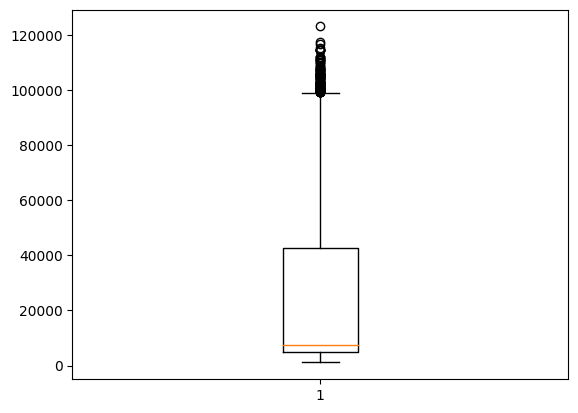

In [ ]:
plt.boxplot(df['price'])
plt.show()

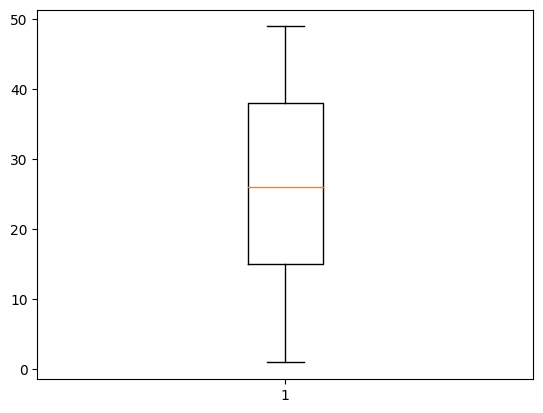

In [ ]:
plt.boxplot(df['days_left'])
plt.show()

## **Treating outliers**

In [ ]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method ='iqr',tail='both', fold=1.5)

In [ ]:
df['price'] = win.fit_transform(df[['price']])

## **We can make some charts to showcase**

In [ ]:
df1 = df.groupby(['flight','airline'], as_index = False)['airline'].value_counts()
df1

,flight,airline,count
0,6E-102,Indigo,39
1,6E-105,Indigo,5
2,6E-113,Indigo,49
3,6E-121,Indigo,20
4,6E-123,Indigo,5
...,...,...,...
1556,UK-988,Vistara,1381
1557,UK-993,Vistara,911
1558,UK-994,Vistara,1273
1559,UK-995,Vistara,1024


In [ ]:
df2 = df.groupby(['flight', 'airline','class'], as_index = False)['class'].value_counts()
df2

,flight,airline,class,count
0,6E-102,Indigo,Economy,39
1,6E-105,Indigo,Economy,5
2,6E-113,Indigo,Economy,49
3,6E-121,Indigo,Economy,20
4,6E-123,Indigo,Economy,5
...,...,...,...,...
1850,UK-994,Vistara,Economy,607
1851,UK-995,Vistara,Business,510
1852,UK-995,Vistara,Economy,514
1853,UK-996,Vistara,Business,679


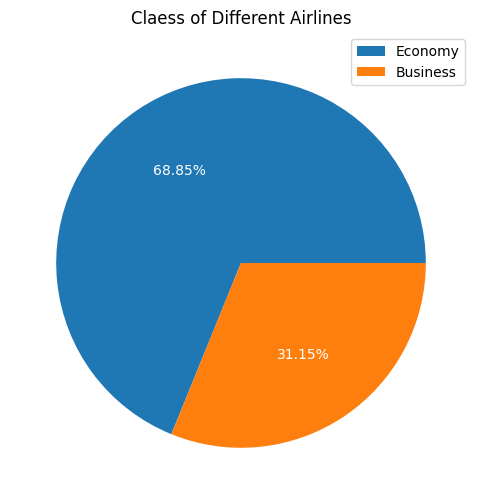

In [ ]:
plt.figure(figsize =(8,6))
plt.pie(df['class'].value_counts() , autopct ='%.2f%%' ,textprops ={'color':'white'} )
plt.legend(['Economy','Business'])
plt.title("Claess of Different Airlines")
plt.show()

## **Does Price vary with Airlines**

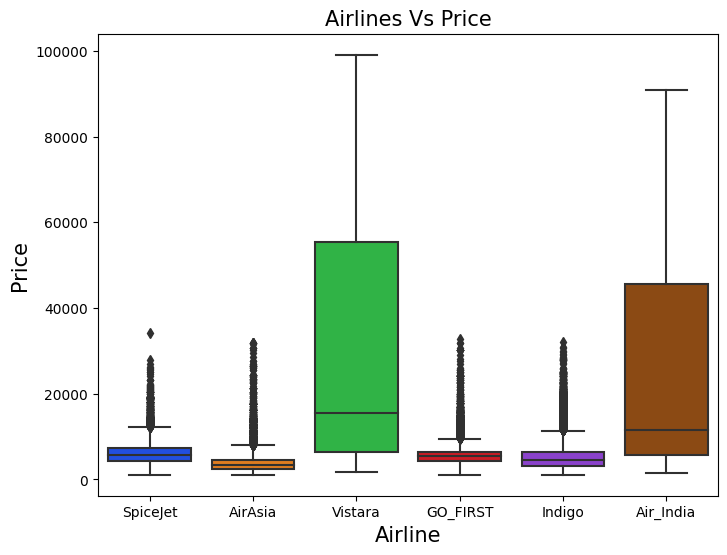

In [ ]:
plt.figure(figsize =(8,6))
sns.boxplot(x=df['airline'], y= df['price'],palette='bright')
plt.title("Airlines Vs Price", fontsize=15)
plt.xlabel("Airline", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How does ticket price vary with Class**

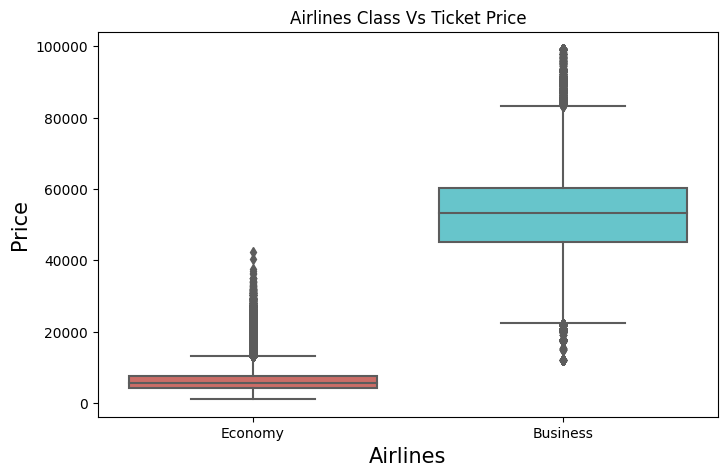

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['class'], y=df['price'], palette='hls')
plt.title("Airlines Class Vs Ticket Price")
plt.xlabel("Airlines", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How does the price varies with number of stops??**

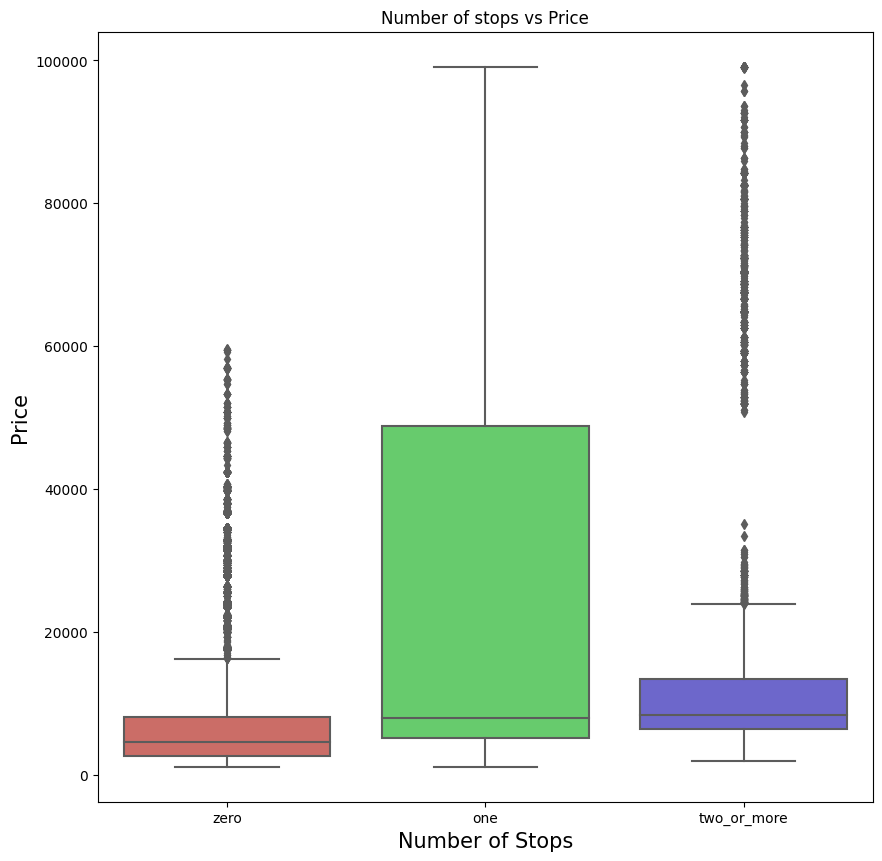

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['stops'], y=df['price'],palette='hls')
plt.title("Number of stops vs Price")
plt.xlabel("Number of Stops", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How ticket price varies with Departure time and arrival time??**

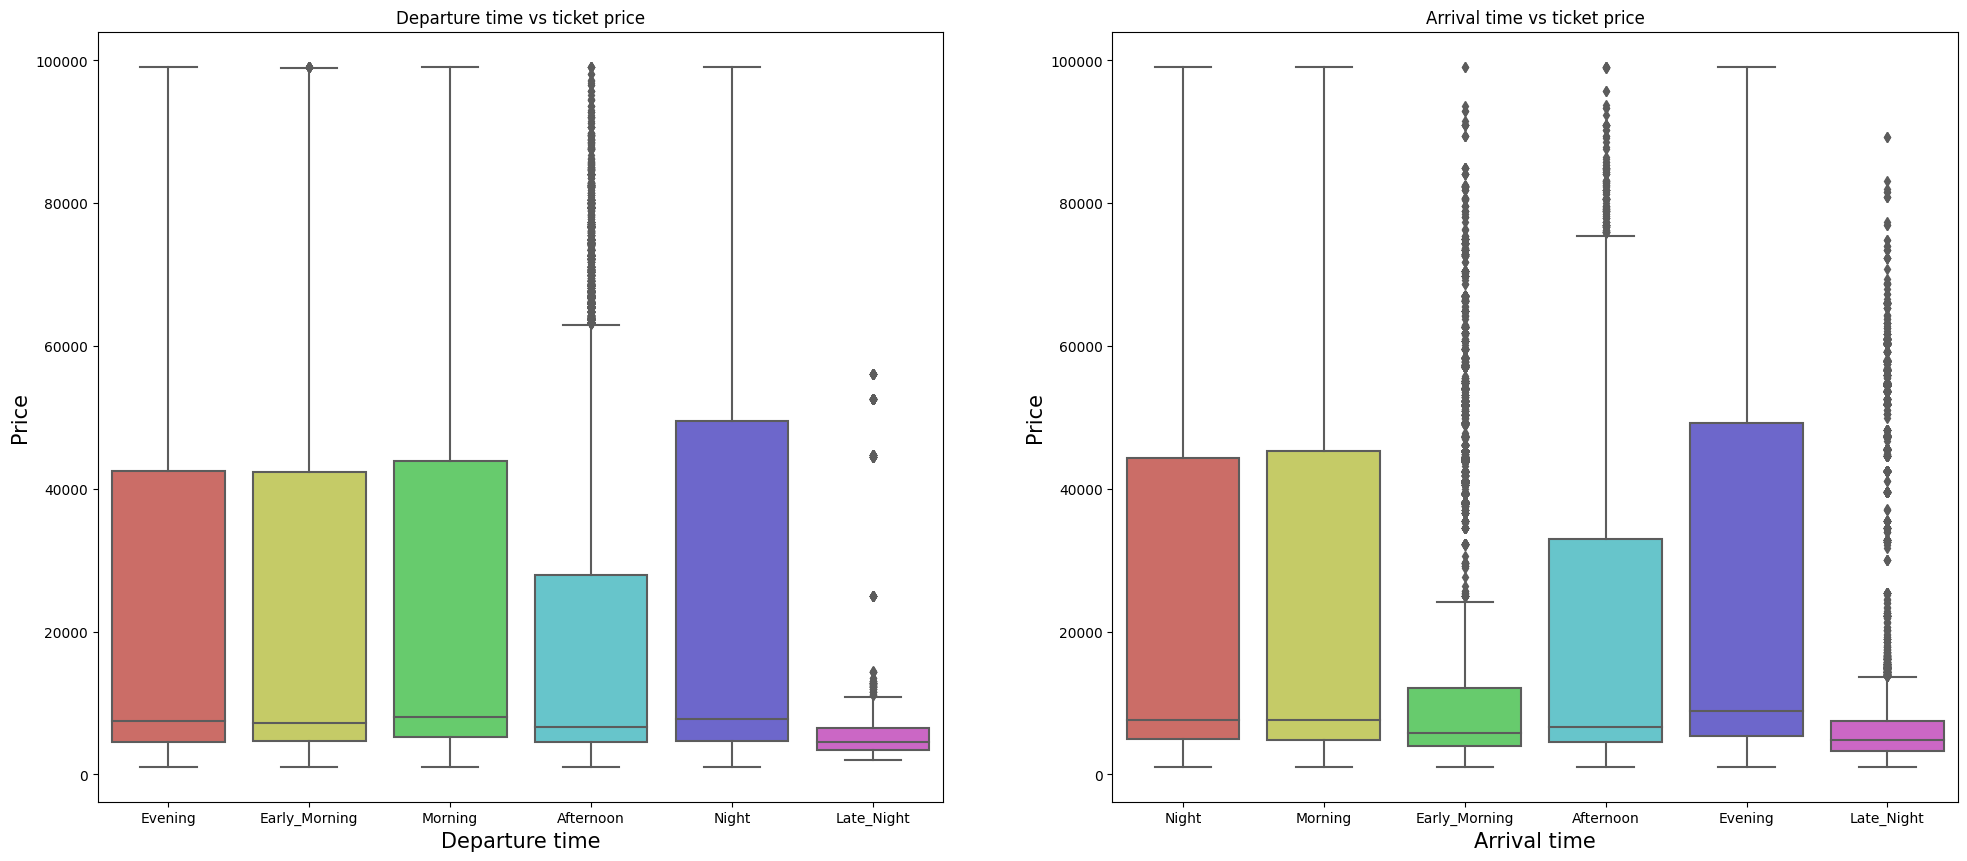

In [ ]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time', y='price', data=df, palette='hls')
plt.title("Departure time vs ticket price")
plt.xlabel("Departure time", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time', y='price', data=df, palette='hls')
plt.title("Arrival time vs ticket price")
plt.xlabel("Arrival time", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How ticket price varies based on Source City and Destination City??**

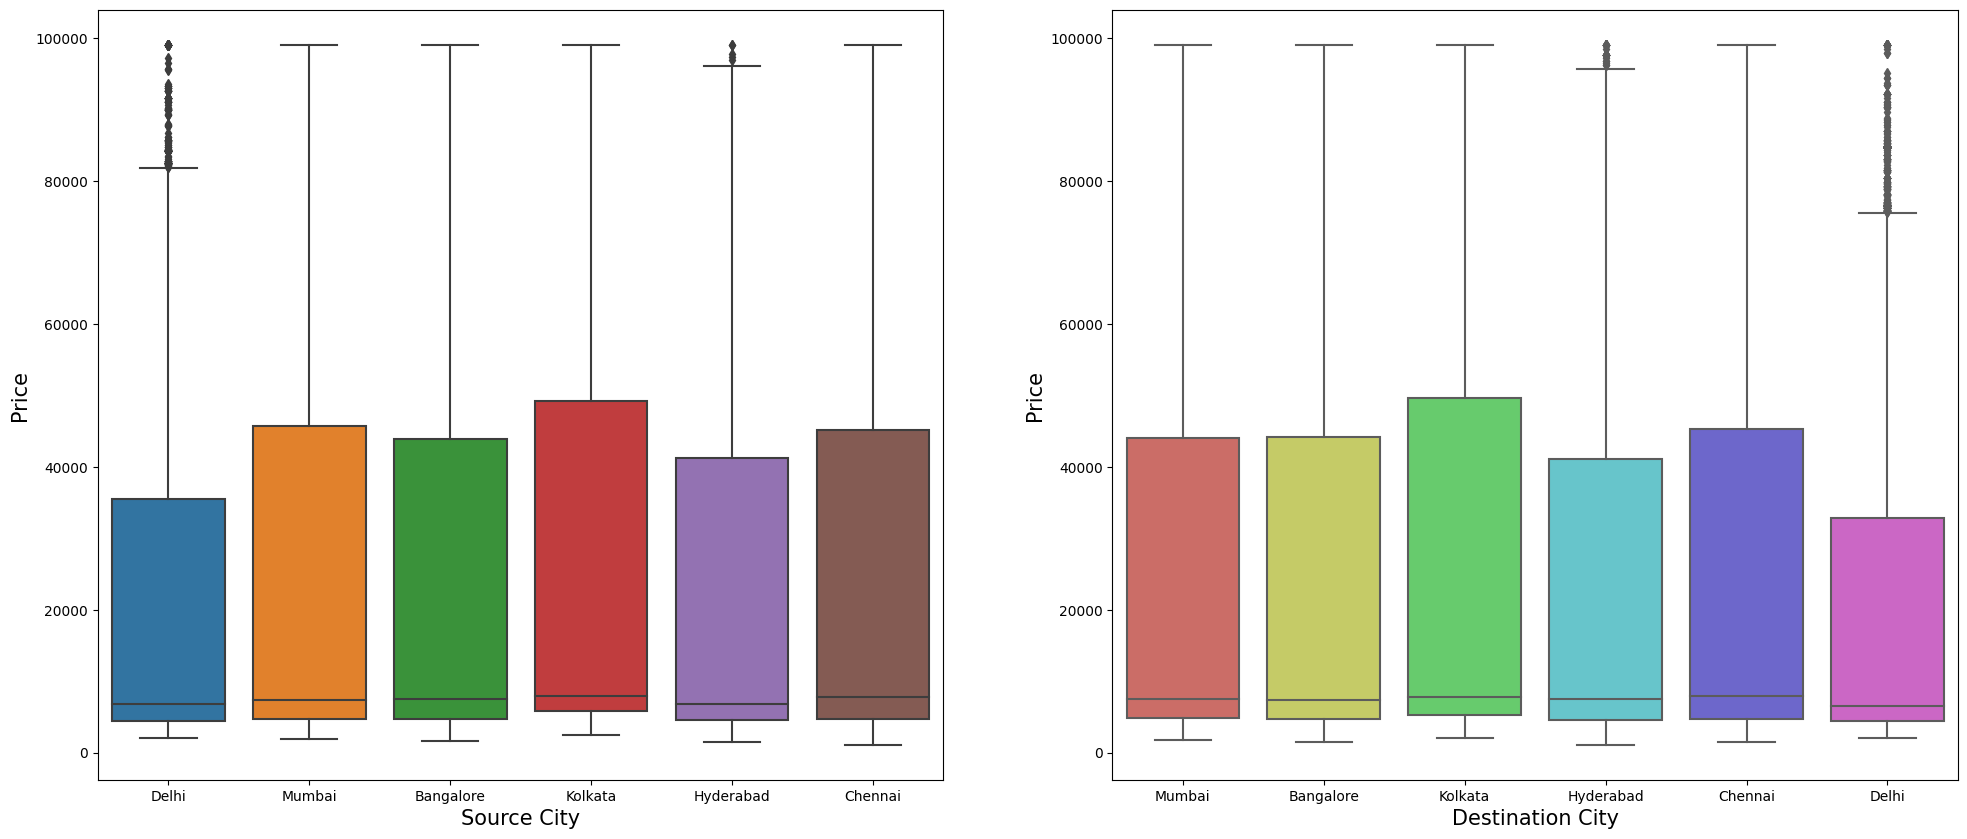

In [ ]:
plt.figure(figsize =(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city', y='price', data = df)
plt.xlabel("Source City", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city', y='price', data=df, palette='hls')
plt.ylabel("Price", fontsize=15)
plt.xlabel("Destination City", fontsize =15)
plt.show()

## **How price varies with Flight Duration based on class??**

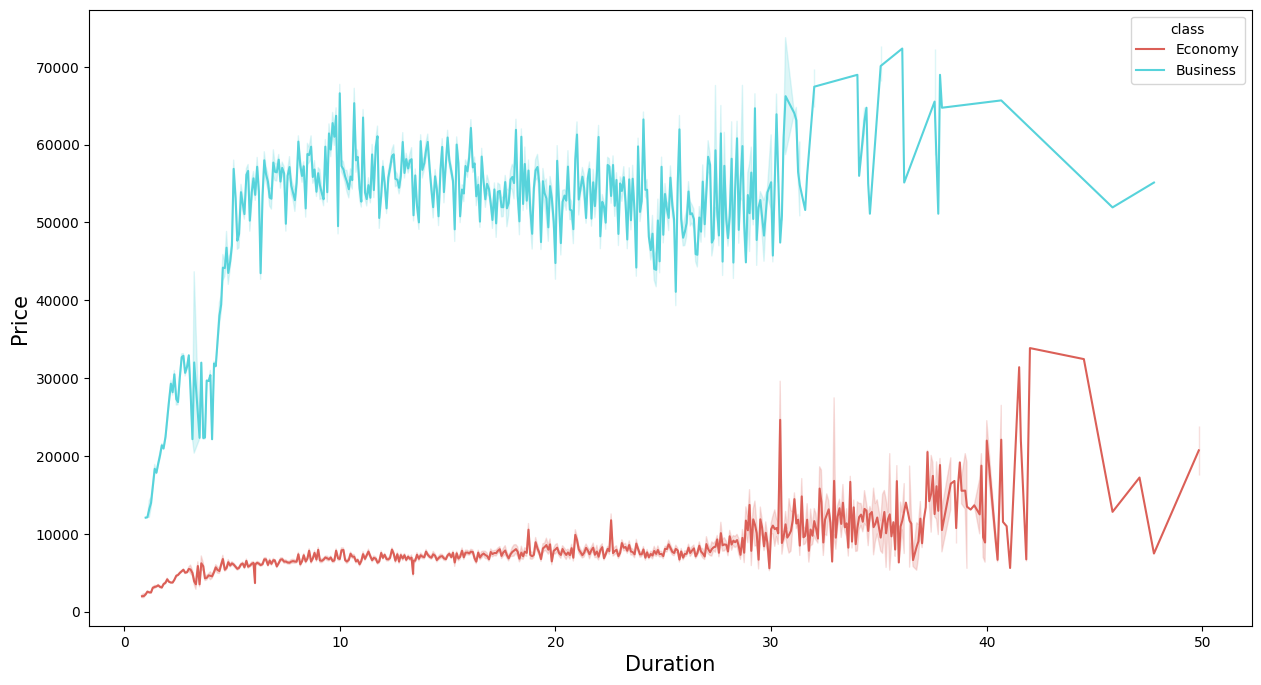

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='duration', y='price', hue='class', palette='hls')
plt.xlabel("Duration", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How the price affects with the number of days left??**

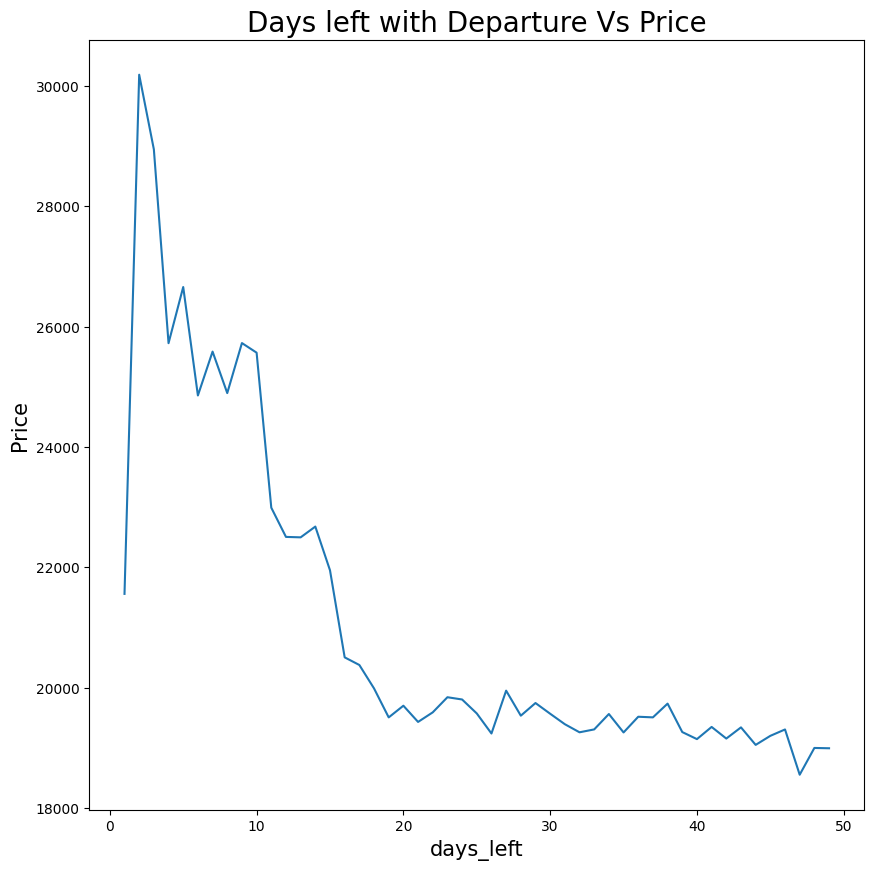

In [ ]:

plt.figure(figsize=(10,10))
plt.xlabel("No of days left", fontsize=15)
df[['days_left' , 'price']].groupby(['days_left'])['price'].mean().plot()
plt.ylabel("Price", fontsize=15)
plt.title("Days left with Departure Vs Price", fontsize=20)
plt.show()

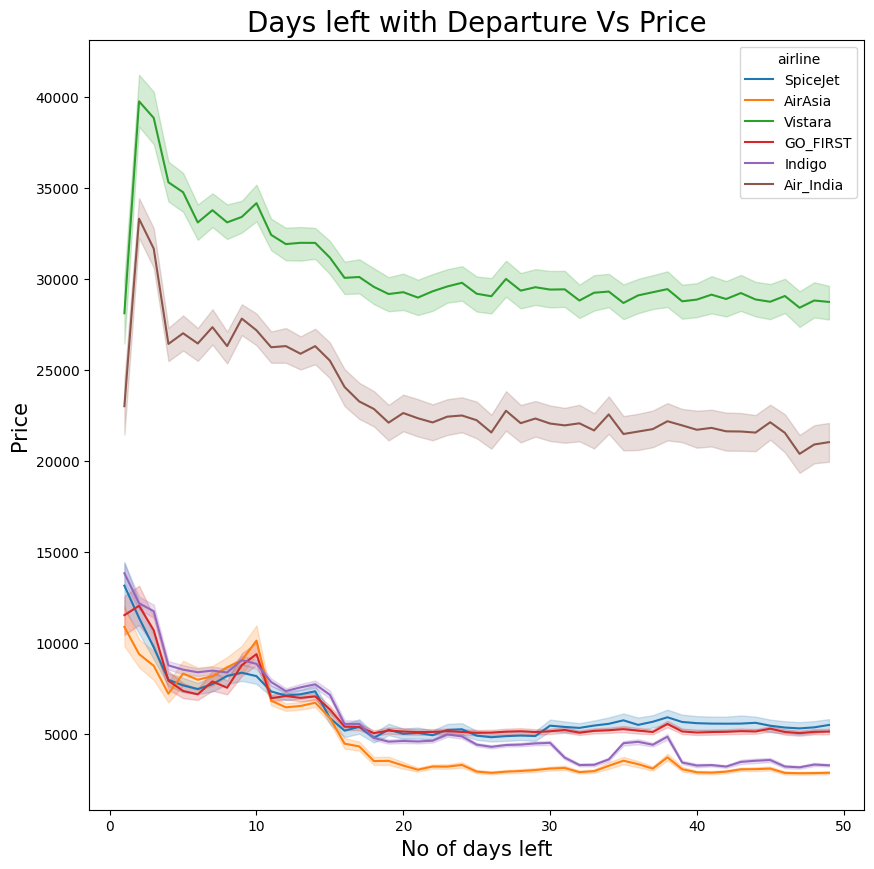

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("No of days left", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='days_left', y='price', hue='airline',color='blue')
plt.title("Days left with Departure Vs Price", fontsize=20)
plt.show()

### **Total number of flights from one city to another**

In [ ]:
df.groupby(['source_city', 'destination_city'] , as_index=False)["flight"].count()

,source_city,destination_city,flight
0,Bangalore,Chennai,6410
1,Bangalore,Delhi,13756
2,Bangalore,Hyderabad,8928
3,Bangalore,Kolkata,10028
4,Bangalore,Mumbai,12939
5,Chennai,Bangalore,6493
6,Chennai,Delhi,9783
7,Chennai,Hyderabad,6103
8,Chennai,Kolkata,6983
9,Chennai,Mumbai,9338


## **Average Price of different Airlines from Source City to destination City**

In [ ]:
df.groupby(['airline', 'source_city', 'destination_city'], 
           as_index=False)["price"].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


### **Modifying columns into numbers**

In [ ]:
df_final = df.drop(['flight','duration'],axis =1)

In [ ]:
df_final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585


In [ ]:
le= LabelEncoder()
le_airline = LabelEncoder()
le_source_city = LabelEncoder()
le_departure_time = LabelEncoder()
le_arrival_time = LabelEncoder()
le_destination_city = LabelEncoder()
le_class = LabelEncoder()

In [ ]:
df_final['airline'] = le_airline.fit_transform(df_final['airline'])

In [ ]:
le_stops = LabelEncoder()

In [ ]:
df_final['source_city'] = le_source_city.fit_transform(df_final['source_city'])
df_final['departure_time'] = le_departure_time.fit_transform(df_final['departure_time'])
df_final['stops'] = le_stops.fit_transform(df_final['stops'])
df_final['arrival_time'] = le_arrival_time.fit_transform(df_final['arrival_time'])
df_final['destination_city'] = le_destination_city.fit_transform(df_final['destination_city'])
df_final['class'] = le_class.fit_transform(df_final['class'])

In [ ]:
df_final.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,4,2,2,2,5,5,1,1,5953
1,4,2,1,2,4,5,1,1,5953
2,0,2,1,2,1,5,1,1,5956
3,5,2,4,2,0,5,1,1,5955
4,5,2,4,2,4,5,1,1,5955


In [ ]:
# Splitting the data
x = df_final.drop('price',axis =1)
y= df_final['price']
# Splitting data in Train and test dataset.
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240122, 8), (60031, 8), (240122,), (60031,))

In [ ]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
198583,3,1,0,2,2,4,1,11
50502,1,5,0,0,3,2,1,38
2232,5,2,0,0,5,5,1,13
124463,4,4,0,0,2,2,1,31
282144,5,3,4,0,5,0,0,35
...,...,...,...,...,...,...,...,...
299741,5,1,2,0,2,3,0,40
9372,5,2,4,0,5,5,1,46
105595,3,0,4,0,2,4,1,22
93553,0,0,4,2,0,2,1,47


In [ ]:
x_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
201208,5,1,1,0,4,4,1,36
252951,1,0,5,0,4,4,0,4
149426,1,4,0,0,5,1,1,17
229882,1,5,2,0,4,2,0,48
22822,2,2,1,0,2,4,1,17
...,...,...,...,...,...,...,...,...
17628,5,2,0,0,5,0,1,38
53093,3,5,4,0,2,0,1,3
262719,1,4,4,0,2,2,0,27
292326,1,1,5,0,4,5,0,32


In [ ]:
#Creating a function to calculate different statstical numbers:
def Result_Stat(x_train, y_train,x_test, y_test,models):
   #Predict model with test data.
   y_pred = models.predict(x_test)
   #Print model name
   print("Model Name: ",models)
   print("Test Accuracy: ",round(models.score(x_test, y_test),3))
   print("Train Accuracy: ",round(models.score(x_train, y_train),3))
   print("Mean Squared Error_MSE: ",round(mean_squared_error(y_test, y_pred),3))
   print("Root Mean Squared Error_RMSE: ",round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
   print("------------------------------------------------------------------------")

In [ ]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
198583,3,1,0,2,2,4,1,11
50502,1,5,0,0,3,2,1,38
2232,5,2,0,0,5,5,1,13
124463,4,4,0,0,2,2,1,31
282144,5,3,4,0,5,0,0,35
...,...,...,...,...,...,...,...,...
299741,5,1,2,0,2,3,0,40
9372,5,2,4,0,5,5,1,46
105595,3,0,4,0,2,4,1,22
93553,0,0,4,2,0,2,1,47


## **Creating object of different regression models**

In [ ]:
lr = LinearRegression()
print("Linear regression model fitting")
lr.fit(x_train,y_train)
print("Linear Regression Model Test Result\n")
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = lr )

dtr = DecisionTreeRegressor()
print("Decision Tree Regression model fitting")
dtr.fit(x_train, y_train)
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = dtr )


rfr = RandomForestRegressor()
print("Random Forest Regressor Model Training")
rfr.fit(x_train, y_train)
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = rfr)


xgr = XGBRegressor()
print("XGB Regressor Model Training")
xgr.fit(x_train, y_train)
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = xgr)


knn = KNeighborsRegressor(n_neighbors=5)
print("K Neighbour Regressor Model Training")
knn.fit(x_train, y_train)
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = knn)


ridge = Ridge()
print("Ridge Model Training")
ridge.fit(x_train, y_train)
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = ridge)



lasso = linear_model.Lasso(alpha = 0.1)
print("Lasso Model Training")
lasso.fit(x_train, y_train)
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = lasso)

gbr = GradientBoostingRegressor(loss='squared_error', random_state = 42,learning_rate=0.1, n_estimators=100,criterion='friedman_mse',
                                     min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                     init=None,  max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                     warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)


print("Gradient Boosting Regressor model Training")
gbr.fit(x_train, y_train)
Result_Stat(x_train = x_train, y_train = y_train, x_test=x_test,y_test=y_test, models = gbr)




Linear regression model fitting
Linear Regression Model Test Result

Model Name:  LinearRegression()
Test Accuracy:  0.905
Train Accuracy:  0.904
Mean Squared Error_MSE:  49221894.953
Root Mean Squared Error_RMSE:  7015.832
------------------------------------------------------------------------
Decision Tree Regression model fitting
Model Name:  DecisionTreeRegressor()
Test Accuracy:  0.955
Train Accuracy:  0.983
Mean Squared Error_MSE:  23229295.399
Root Mean Squared Error_RMSE:  4819.678
------------------------------------------------------------------------
Random Forest Regressor Model Training
Model Name:  RandomForestRegressor()
Test Accuracy:  0.962
Train Accuracy:  0.982
Mean Squared Error_MSE:  19436910.601
Root Mean Squared Error_RMSE:  4408.731
------------------------------------------------------------------------
XGB Regressor Model Training
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=Non

### **Showing Final Results**

## XGB Regressor model is having R2 score of 96.9% and RMSE of 4059.089 which is best among all model, hence we can finalize XGB Regressor model for prediction

In [ ]:
y_pred = xgr.predict(x_test)
out = pd.DataFrame({"Price Actual":y_test, "Predicted Price":y_pred})
out

,Price Actual,Predicted Price
201208,5937,6473.637695
252951,60508,58728.496094
149426,8264,8732.463867
229882,53152,39950.515625
22822,5954,7060.451660
...,...,...
17628,4706,4833.534180
53093,9214,12414.159180
262719,45012,50604.734375
292326,61649,51390.125000


In [ ]:
np.mean(out['Predicted Price'])

20795.291

In [ ]:
np.mean(out['Price Actual'])

20827.97989372158

### **Saving Model and Encoder In Pickle File**

In [ ]:
import pickle

In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(xgr,file)

In [ ]:
with open('le_airline.pkl','wb') as file:
  pickle.dump(le_airline,file)

with open('le_source_city.pkl','wb') as file:
  pickle.dump(le_source_city,file)
with open('le_departure_time.pkl','wb') as file:
  pickle.dump(le_departure_time,file)
with open('le_stops.pkl','wb') as file:
  pickle.dump(le_stops,file)
with open('le_arrival_time.pkl','wb') as file:
  pickle.dump(le_arrival_time,file)

with open('le_destination_city.pkl','wb') as file:
  pickle.dump(le_destination_city,file)
with open('le_class.pkl','wb') as file:
  pickle.dump(le_class,file)